In [51]:
import pandas as pd
data_frame=pd.read_csv('confirmed_data.csv')
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data_frame

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
2,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
4,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,28-Sep-21,2021-09-28,Confirmed,21898,1,771,49,390,1,2,...,40,4,64,1630,220,19,16,15,708,0
564,29-Sep-21,2021-09-29,Confirmed,23166,0,1084,128,366,4,5,...,22,2,57,1624,245,20,6,11,748,0
565,30-Sep-21,2021-09-30,Confirmed,27285,1,1010,54,376,6,6,...,35,5,39,1612,214,22,0,7,749,0
566,01-Oct-21,2021-10-01,Confirmed,23918,0,809,54,303,3,2,...,27,4,31,1597,220,21,35,13,708,0


In [42]:
data_frame.shape

(568, 42)

In [43]:
train_data=data_frame['TT'].loc[0:450]

In [44]:
test_data=data_frame['TT'].loc[451:567]

In [45]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_data,order=(3, 1, 1),seasonal_order=(3,1,1,71))

In [46]:
model_fit=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.93497D+00    |proj g|=  2.05712D-01

At iterate    5    f=  8.84684D+00    |proj g|=  7.44591D-03

At iterate   10    f=  8.84568D+00    |proj g|=  9.46642D-03

At iterate   15    f=  8.82385D+00    |proj g|=  5.35167D-02

At iterate   20    f=  8.81453D+00    |proj g|=  1.30303D-02

At iterate   25    f=  8.81388D+00    |proj g|=  7.39512D-04

At iterate   30    f=  8.81372D+00    |proj g|=  2.17013D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [47]:
data=data_frame.copy()
data['Forecasted_data']=model_fit.predict(start=451,end=567,dynamic=True)

In [48]:
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    mse=mean_squared_error(actual,forecast)
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax,'mse':mse})

forecast_accuracy(data['Forecasted_data'].dropna(), test_data.values)

/var/folders/4b/082wp8yj1vdb15yd5756bphm0000gn/T/ipykernel_2604/1071402018.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
/var/folders/4b/082wp8yj1vdb15yd5756bphm0000gn/T/ipykernel_2604/1071402018.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3

{'mape': 3.135366898044335,
 'me': -110591.17396438969,
 'mae': 110591.17396438969,
 'mpe': -3.135366898044335,
 'rmse': 125477.1693510965,
 'acf1': 0.97546620757312,
 'corr': 0.6373490006203848,
 'minmax': 3.1353668980443357,
 'mse': 15744520028.36375}

<AxesSubplot:>

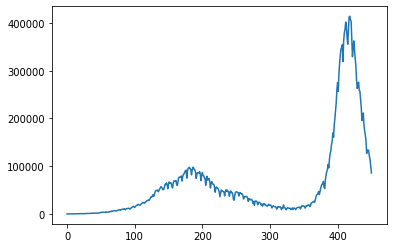

In [49]:
train_data.plot()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


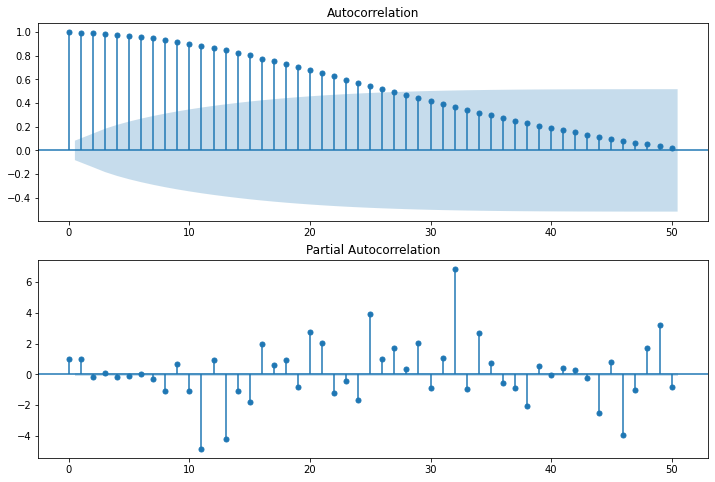

In [99]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_frame['TT'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_frame['TT'],lags=50,ax=ax2)

In [106]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_frame['TT'],order=(2,0,1);
model_fit=model.fit()

In [108]:
data=data_frame.copy()
data['Forecasted_data']=model_fit.predict(start=451,end=567)

<AxesSubplot:>

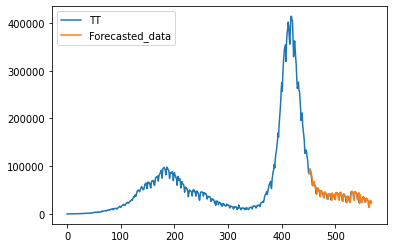

In [109]:
data[['TT','Forecasted_data']].plot()

In [110]:
#metrics
from sklearn.metrics import mean_squared_error

In [111]:
mean_squared_error(test_data,data['Forecasted_data'].dropna())
mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))

In [112]:
100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))

86.9809474784615